## Homework-5
### CSC-722: Machine Learning Fundamentals
### Md Hafizur Rahman

## Problem Statement
### This homework is about linear regression
1) find the regression line --> y_pred = alpha x + b --> find alpha and b, write the code

2) plot the regression line and the the actual data for RES = .1, 1, 2, 4. for each RES, one plot

3) find mean square error (MSE) of the predicted value and the actual value, i.e., y_pred and y for RES = .1, 1, 2, 4.

4) explain what RES is, what it does, and what happen to the estimation (regression) when you increase it
### MSE formula = (1/N) * np.sum((y_pred - y)**2)

## Theory: 
Linear regression is a common method to model the relationship between a dependent variable and one or more independent variables. Linear models are developed using the parameters which are estimated from the data. Linear regression is useful in prediction and forecasting where a predictive model is fit to an observed data set of values to determine the response. Linear regression models are often fitted using the least-squares approach where the goal is to minimize the error. In general, the simple linear regression equations

$y=b_0+b_1x$

where, y is dependent variable, 𝐱 independent variables, $b_0$ is the intercept, and $b_1$ is the slope.

In training phase, we have $x_i$ and $y_i$ then we need to find the values of $b_1=\frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n (x_i-\bar{x})^2}$ and $b_0=\bar{y}-b_1\bar{x}$.


To implement the simple linear regression we need to know the below formulas.

=> A formula for calculating the mean values, $\bar{x}=\frac{1}{n}\sum_{i=1}^n x_n$ and $\bar{y}=\frac{1}{n}\sum_{i=1}^n y_n$.

=> A formula for calculating the variance value, $\sigma^2=\frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n}$.

=> Formula for calculating the covariance between two series of readings, $cov_{x,y}=\frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{n}$

=> Formulas for calculating the $b_1=\frac{cov_{x,y}}{\sigma^2}$ and $b_0=\bar{y}-b_1\bar{x}$ values.


#### Problem-1: Find the regression line --> y_pred = alpha x + b --> find alpha and b, write the code.
##### Ans:
I implement this simple linear regression method in python without using any libraries and verified these results using scikit library. For four RES values, I will get four different Y values that are $\bar{y_1}$, $\bar{y_2}$, $\bar{y_3}$, and $\bar{y_4}$.

In [34]:
#import necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score 
import statsmodels.api as sm 

#Different RES values
RES = [0.1, 1, 2, 4]
# Generate 'random' data
np.random.seed(0)
# Array of 100 values with mean = 1.5, stddev = 2.5
X = 2.5 * np.random.randn(100) + 1.5
# Generate 100 residual terms
res = RES[0] * np.random.randn(100)
# Actual values of Y for RSE=0.1
y1 = 2 + 0.3 * X + res    
# Generate 100 residual terms
res = RES[1] * np.random.randn(100)
# Actual values of Y for RSE=1
y2 = 2 + 0.3 * X + res
# Generate 100 residual terms
res = RES[2] * np.random.randn(100)
# Actual values of Y for RSE=2
y3 = 2 + 0.3 * X + res 
# Generate 100 residual terms
res = RES[3] * np.random.randn(100)
# Actual values of Y for RSE=4
y4 = 2 + 0.3 * X + res                  

# Create pandas dataframe to store our X and y values
df = pd.DataFrame(
    {'X': X,
     'y1(For RES=0.1)': y1,
     'y2(For RES=1)': y2,
     'y3(For RES=2)': y3,
     'y4(For RES=4)': y4}
)
print('Data Table for different RES: \n')
print(df)

Data Table for different RES: 

           X  y1(For RES=0.1)  y2(For RES=1)  y3(For RES=2)  y4(For RES=4)
0   5.910131         3.961354       3.403857       1.159986       1.378424
1   2.500393         2.615342       2.510739       6.066379      -1.713470
2   3.946845         3.057005       4.283713       2.947725       6.250706
3   7.102233         4.227610       4.785934       2.770313       5.555841
4   6.168895         3.733356       4.490800       5.183435      -3.223485
..       ...              ...            ...            ...            ...
95  3.266433         2.962775       4.116821       1.456945       2.684231
96  1.526250         2.535054       2.555600       4.173723      -0.176337
97  5.964676         3.871753       4.372357       6.071607       1.732467
98  1.817280         2.761508       2.145735       5.478342      -1.526983
99  2.504973         2.885145       3.121548       4.456596       2.440073

[100 rows x 5 columns]


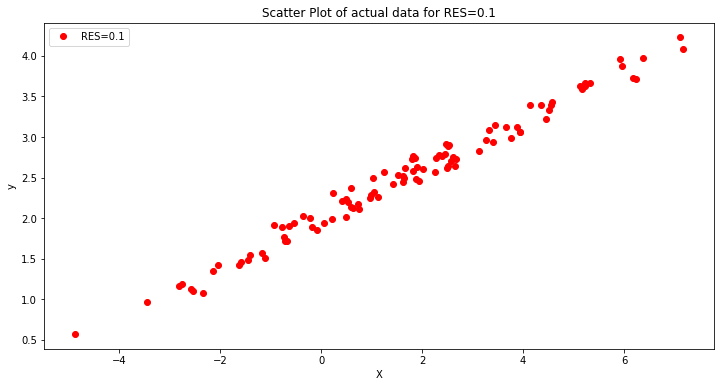

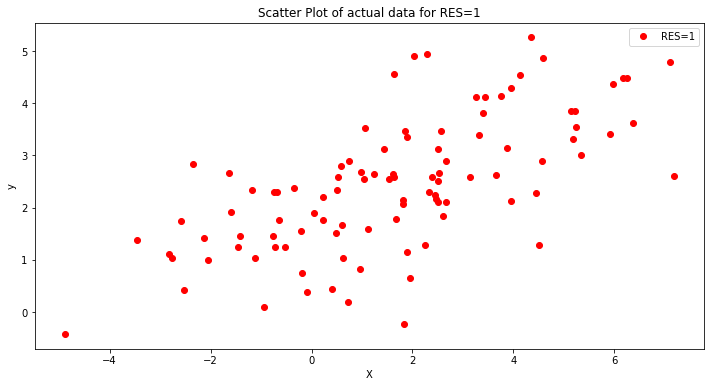

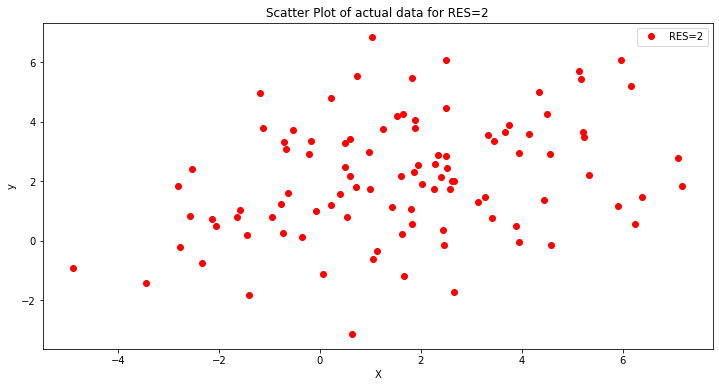

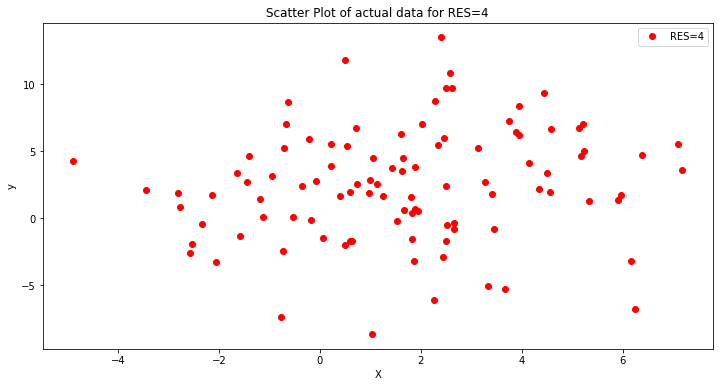

In [35]:
# scatter plot showing actual data for RES 0.1
plt.figure(figsize=(12, 6))
plt.plot(X, y1, color='red', marker='o', linestyle='none')  
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of actual data for RES=0.1')
plt.legend(['RES=0.1'])

# scatter plot showing actual data for RES 1
plt.figure(figsize=(12, 6))
plt.plot(X, y2, color='red', marker='o', linestyle='none')   
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of actual data for RES=1')
plt.legend(['RES=1'])

# scatter plot showing actual data for RES 2
plt.figure(figsize=(12, 6))
plt.plot(X, y3, color='red', marker='o', linestyle='none')   
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of actual data for RES=2')
plt.legend(['RES=2'])

# scatter plot showing actual data for RES 4
plt.figure(figsize=(12, 6))
plt.plot(X, y4, color='red', marker='o', linestyle='none')   
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter Plot of actual data for RES=4')
plt.legend(['RES=4'])

We have different values of Y for different RES. At first, we have calculated $\bar{x}$, $\bar{y_1}$, $\bar{y_2}$, $\bar{y_3}$, and $\bar{y_4}$. Then 

In [51]:
#Determine mean of X, y1, y2, y3, and y4  
x_bar=sum(X)/len(X)
y_bar1=sum(y1)/len(y1)
y_bar2=sum(y2)/len(y2)
y_bar3=sum(y3)/len(y3)
y_bar4=sum(y4)/len(y4)
n=len(X)

#Determine covariance, [Sxy1, Sxy2, Sxy3, Sxy4 for y1, y2, y3, and y4 respectively] and variance, Sxx
Sxy1 = sum(X*y1)- n*x_bar*y_bar1 
Sxy2 = sum(X*y2)- n*x_bar*y_bar2 
Sxy3 = sum(X*y3)- n*x_bar*y_bar3 
Sxy4 = sum(X*y4)- n*x_bar*y_bar4 
Sxx = sum(X*X)-n*x_bar*x_bar

#Determine the slope and intercept of X and y1
b11 = Sxy1/Sxx 
b01 = y_bar1-b11*x_bar

#Determine the slope and intercept of X and y2
b12 = Sxy2/Sxx 
b02 = y_bar2-b12*x_bar 

#Determine the slope and intercept of X and y3
b13 = Sxy2/Sxx 
b03 = y_bar3-b13*x_bar 

#Determine the slope and intercept of X and y4
b14 = Sxy4/Sxx 
b04 = y_bar4-b14*x_bar 

print('The values of slope and intercept for different RES \n')
print("For RES: {0:<1}, The value of b0: {1:>4} and b1: {2:>1}".format(RES[0],b01,b11),"\n")
print("For RES: {0:<1}, The value of b0: {1:>4} and b1: {2:>1}".format(RES[1],b02,b12),"\n")
print("For RES: {0:<1}, The value of b0: {1:>4} and b1: {2:>1}".format(RES[2],b03,b13),"\n")
print("For RES: {0:<1}, The value of b0: {1:>4} and b1: {2:>1}".format(RES[3],b04,b14),"\n")


The values of slope and intercept for different RES 

For RES: 0.1, The value of b0: 2.0006334024924683 and b1: 0.3045879373418554 

For RES: 1, The value of b0: 1.8933302585740774 and b1: 0.3287583537934637 

For RES: 2, The value of b0: 1.5589691060419186 and b1: 0.3287583537934637 

For RES: 4, The value of b0: 2.0335661371051392 and b1: 0.24918339972398762 



#### Problem-2: Plot the regression line and the the actual data for RES = .1, 1, 2, 4. for each RES, one plot.
##### Ans:

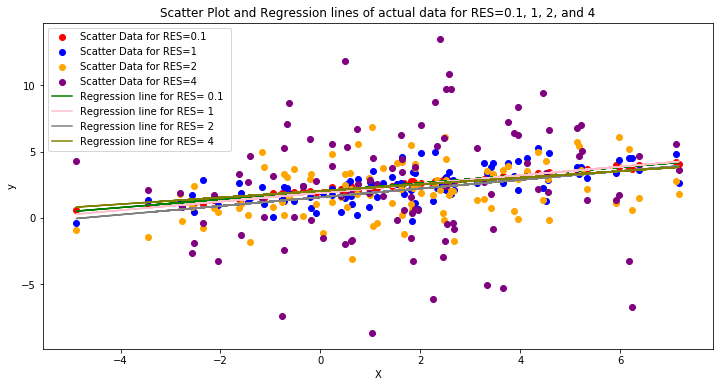

In [37]:
#Determine the predicted line of y1
y_pred1 = b11 * X + b01
#Determine the predicted line of y1
y_pred2 = b12 * X + b02 
#Determine the predicted line of y1
y_pred3 = b13 * X + b03 
#Determine the predicted line of y1
y_pred4 = b14 * X + b04 

#Plotting the data
plt.figure(figsize=(12, 6))
a1=plt.scatter(X, y1, color = 'red') 
a2=plt.scatter(X, y2, color = 'blue') 
a3=plt.scatter(X, y3, color = 'orange') 
a4=plt.scatter(X, y4, color = 'purple')
a5=plt.plot(X, y_pred1, color = 'green') 
a6=plt.plot(X, y_pred2, color = 'pink') 
a7=plt.plot(X, y_pred3, color = 'gray') 
a8=plt.plot(X, y_pred4, color = 'olive') 
plt.xlabel('X') 
plt.ylabel('y')
plt.title('Scatter Plot and Regression lines of actual data for RES=0.1, 1, 2, and 4')
plt.legend([a1, a2, a3, a4, a5[0], a6[0], a7[0], a8[0]], 
           ["Scatter Data for RES=0.1", "Scatter Data for RES=1","Scatter Data for RES=2", 
            "Scatter Data for RES=4", "Regression line for RES= 0.1 ",
            "Regression line for RES= 1 ",
             "Regression line for RES= 2 ", "Regression line for RES= 4 "])

From the above plot, I cannot clearly see the predicted lines for different Y data. For that reason, I plot four graphs for different Y below.

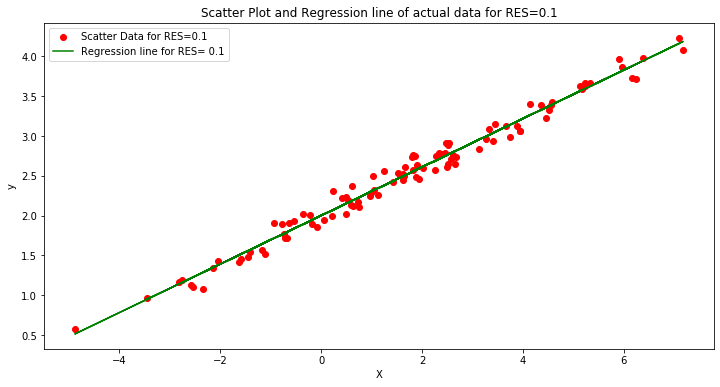

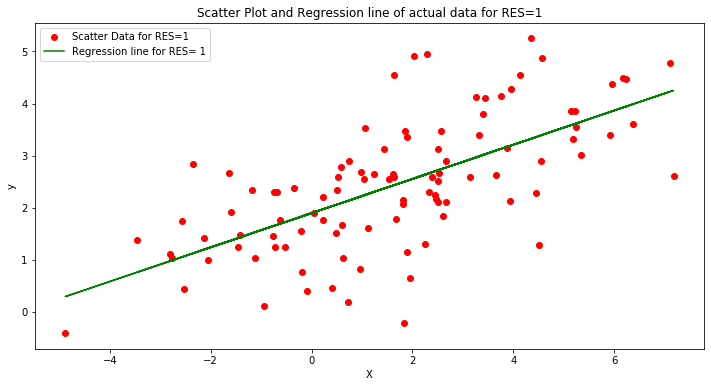

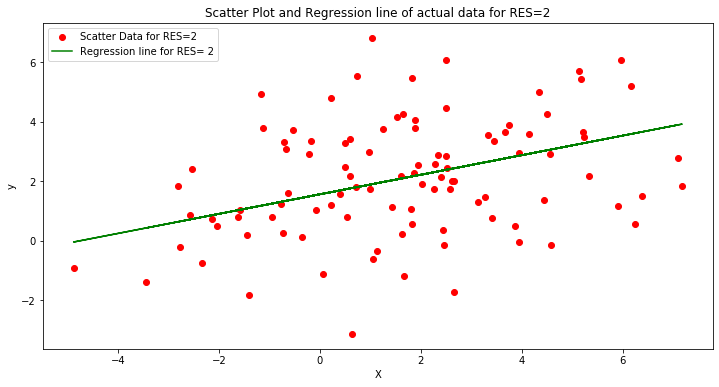

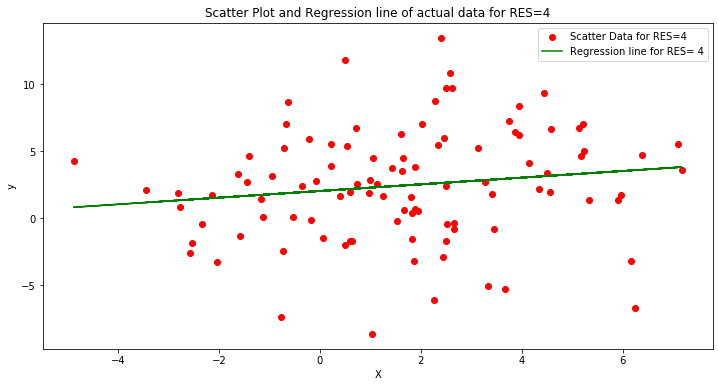

In [38]:
plt.figure(figsize=(12, 6))
c1=plt.scatter(X, y1, color = 'red') 
c2=plt.plot(X, y_pred1, color = 'green') 
plt.xlabel('X') 
plt.ylabel('y')
plt.title('Scatter Plot and Regression line of actual data for RES=0.1')
plt.legend([c1, c2[0]],["Scatter Data for RES=0.1", "Regression line for RES= 0.1" ])

plt.figure(figsize=(12, 6))
c3=plt.scatter(X, y2, color = 'red') 
c4=plt.plot(X, y_pred2, color = 'green') 
plt.xlabel('X') 
plt.ylabel('y')
plt.title('Scatter Plot and Regression line of actual data for RES=1')
plt.legend([c3, c4[0]],["Scatter Data for RES=1", "Regression line for RES= 1" ])

plt.figure(figsize=(12, 6))
c5=plt.scatter(X, y3, color = 'red') 
c6=plt.plot(X, y_pred3, color = 'green') 
plt.xlabel('X') 
plt.ylabel('y')
plt.title('Scatter Plot and Regression line of actual data for RES=2')
plt.legend([c5, c6[0]],["Scatter Data for RES=2", "Regression line for RES= 2" ])

plt.figure(figsize=(12, 6))
c7=plt.scatter(X, y4, color = 'red') 
c8=plt.plot(X, y_pred4, color = 'green') 
plt.xlabel('X') 
plt.ylabel('y')
plt.title('Scatter Plot and Regression line of actual data for RES=4')
plt.legend([c7, c8[0]],["Scatter Data for RES=4", "Regression line for RES= 4" ])

#### Problem-3: Find mean square error (MSE) of the predicted value and the actual value, i.e., y_pred and y for RES = .1, 1, 2, 4.
##### Ans:

In [39]:
error1 = y1 - y_pred1 
error2 = y2 - y_pred2 
error3 = y3 - y_pred3 
error4 = y4 - y_pred4

se1 = sum(error1**2)
se2 = sum(error2**2)
se3 = sum(error3**2)
se4 = sum(error4**2) 
  
mse1 = se1/n
mse2 = se2/n
mse3 = se3/n
mse4 = se4/n
print('Mean squared error(MSE) is', mse1,'for RES 0.1 \n') 
print('Mean squared error(MSE) is', mse2,'for RES 1 \n') 
print('Mean squared error(MSE) is', mse3,'for RES 2 \n') 
print('Mean squared error(MSE) is', mse4,'for RES 4 \n') 

Mean squared error(MSE) is 0.010571718541906304 for RES 0.1 

Mean squared error(MSE) is 0.9010581602850064 for RES 1 

Mean squared error(MSE) is 3.47618680879226 for RES 2 

Mean squared error(MSE) is 17.195257346856103 for RES 4 



#### Problem-4: Explain what RES is, what it does, and what happen to the estimation (regression) when you increase it?
##### Ans:
In regression analysis, the difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual (e). Each data point has one residual.

Residual, RES = Observed value - Predicted value

RES = y - ŷ 

ŷ=y-RES       --------(1)

Both the sum and the mean of the residuals are equal to zero. That is, Σ e = 0 and e = 0.

From equation (1), if I increase the value of RES, then the estimated value will increase. As a result, the mean error square of the model will increase, which is shown above.

#### I verified the avobe results by using scikit library.

In [40]:
#Use scikit library to confirm the above steps.
x = X.reshape(-1,1) 

# Fit the data(train the model) 
m1=LinearRegression().fit(x, y1)
m2=LinearRegression().fit(x, y2)
m3=LinearRegression().fit(x, y3)
m4=LinearRegression().fit(x, y4)
  
# Predict 
y_predicted1 = m1.predict(x) 
y_predicted2 = m2.predict(x) 
y_predicted3 = m3.predict(x) 
y_predicted4 = m4.predict(x) 
  
# model evaluation 
mse1=mean_squared_error(y1,y_predicted1) 
mse2=mean_squared_error(y2,y_predicted2) 
mse3=mean_squared_error(y3,y_predicted3) 
mse4=mean_squared_error(y4,y_predicted4) 
  

# printing values 
print('Slopes, b1:\n' ,m1.coef_,'[For RES=0.1] \n', m2.coef_,'[For RES=1] \n', 
      m3.coef_,'[For RES=2] \n', m4.coef_, "[For RES=4] \n") 
print('Intercepts, b0:\n', m1.intercept_,'[For RES=0.1] \n', m2.intercept_,
      '[For RES=1] \n', m3.intercept_,'[For RES=2] \n', m4.intercept_, '[For RES=4] \n',) 
print('Mean squared error(MSE) is', mse1,'for RES 0.1 \n') 
print('Mean squared error(MSE) is', mse2,'for RES 1 \n') 
print('Mean squared error(MSE) is', mse3,'for RES 2 \n') 
print('Mean squared error(MSE) is', mse4,'for RES 4 \n') 

Slopes, b1:
 [0.30458794] [For RES=0.1] 
 [0.32875835] [For RES=1] 
 [0.25582252] [For RES=2] 
 [0.2491834] [For RES=4] 

Intercepts, b0:
 2.0006334024924683 [For RES=0.1] 
 1.8933302585740774 [For RES=1] 
 1.6792782174443293 [For RES=2] 
 2.0335661371051406 [For RES=4] 

Mean squared error(MSE) is 0.0105717185419063 for RES 0.1 

Mean squared error(MSE) is 0.9010581602850063 for RES 1 

Mean squared error(MSE) is 3.4424128901394915 for RES 2 

Mean squared error(MSE) is 17.195257346856103 for RES 4 

